In [4]:
import pandas as pd

In [5]:
from sklearn.decomposition import PCA
import numpy as np

In [6]:
from sklearn.preprocessing import MinMaxScaler

In [7]:
all_data = pd.read_excel('./project_data/all_data.xlsx')

In [8]:
all_data

,Year,PLAYER,TEAM,AGE,GP,W,L,total_MIN,total_PTS,total_FGM,...,per_game_REB,per_game_AST,per_game_TOV,per_game_STL,per_game_BLK,per_game_PF,per_game_FP,per_game_DD2,per_game_TD3,per_game_+/-
0,2000,_2000_Shaquille O'Neal,LAL,28,79,66,13,3165,2344,956,...,13.6,3.8,2.8,0.5,3.0,3.2,59.3,63,0,8.9
1,2000,_2000_Chris Gatling,DEN,32,85,34,51,1810,1014,365,...,5.9,0.8,2.0,1.0,0.3,2.9,22.0,11,0,-0.7
2,2000,_2000_Allen Iverson,PHI,25,70,42,28,2856,1989,729,...,3.8,4.7,3.3,2.1,0.1,2.3,43.1,1,0,1.8
3,2000,_2000_Karl Malone,UTA,36,82,55,27,2946,2095,752,...,9.5,3.7,2.8,1.0,0.9,2.8,45.2,43,0,5.9
4,2000,_2000_Grant Hill,DET,27,74,40,34,2775,1906,696,...,6.6,5.2,3.2,1.4,0.6,2.6,44.2,13,0,3.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8503,2022,_2022_Ish Wainright,PHX,27,45,36,9,359,108,41,...,1.2,0.3,0.3,0.4,0.1,1.1,5.8,0,0,0.9
8504,2022,_2022_Miles McBride,NYK,21,40,19,21,372,89,32,...,1.1,1.0,0.1,0.4,0.0,1.1,6.0,0,0,2.5
8505,2022,_2022_Dylan Windler,CLE,25,50,28,22,459,110,37,...,1.8,0.7,0.3,0.3,0.1,0.9,6.1,0,0,-0.2
8506,2022,_2022_Jericho Sims,NYK,23,41,19,22,555,90,39,...,4.1,0.5,0.5,0.3,0.5,1.6,9.8,1,0,1.9


In [9]:
scalered_data_by_year = {}
for i in range(2000,2023):
    # select the data from that year
    df = all_data[all_data["Year"] == i]
    trimed_df  = df.drop(columns = ['Year','PLAYER','TEAM','AGE'])
    df_array = trimed_df.to_numpy()
    scaler = MinMaxScaler()
    scaler.fit(df_array)
    scalered_df = scaler.transform(df_array)
    scalered_data_by_year[i] = scalered_df

In [10]:
scalered_data_by_year

{2000: array([[0.91780822, 0.98461538, 0.11666667, ..., 1.        , 0.        ,
         1.        ],
        [1.        , 0.49230769, 0.75      , ..., 0.17460317, 0.        ,
         0.47826087],
        [0.79452055, 0.61538462, 0.36666667, ..., 0.01587302, 0.        ,
         0.61413043],
        ...,
        [0.        , 0.01538462, 0.05      , ..., 0.        , 0.        ,
         0.17391304],
        [0.23287671, 0.13846154, 0.2       , ..., 0.        , 0.        ,
         0.46195652],
        [0.20547945, 0.18461538, 0.11666667, ..., 0.        , 0.        ,
         0.29891304]]),
 2001: array([[0.95588235, 0.5       , 0.73333333, ..., 0.07575758, 0.14285714,
         0.44378698],
        [0.82352941, 0.85185185, 0.26666667, ..., 0.06060606, 0.        ,
         0.79881657],
        [0.86764706, 0.87037037, 0.3       , ..., 0.90909091, 0.        ,
         0.86390533],
        ...,
        [0.14705882, 0.09259259, 0.18333333, ..., 0.        , 0.        ,
         0.49112426],


In [11]:
#merge all the arrays to one
arr = scalered_data_by_year[2000]
for i in range(2001,2023):
    arr = np.vstack((arr,scalered_data_by_year[i]))

In [12]:
# implement pca
pca = PCA()
pca.fit_transform(arr)

array([[ 3.32141802e+00,  2.43251717e+00,  7.25353696e-02, ...,
         2.77592037e-16,  5.76317045e-17, -3.39436347e-16],
       [ 6.93920036e-01,  8.36167921e-01,  3.35262852e-01, ...,
         3.42366351e-16, -1.48827480e-16, -4.67272461e-16],
       [ 2.41084321e+00, -7.44148108e-01,  6.48644116e-01, ...,
         1.09112124e-16,  1.15471171e-16, -5.30940146e-17],
       ...,
       [-1.54762801e+00, -3.57633862e-01, -2.30939522e-01, ...,
         3.24964185e-17,  1.78688191e-18,  1.84287099e-17],
       [-1.48309054e+00,  1.23957539e+00, -5.37222851e-01, ...,
        -1.57596162e-17,  1.54023060e-17,  2.45270732e-17],
       [-1.69648806e+00, -8.66243426e-01,  4.52373682e-01, ...,
        -8.82633293e-18, -6.08995963e-17,  6.03801537e-18]])

In [14]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.9) + 1
print(d)

13


In [31]:
pca = PCA()
pca.fit_transform(arr)
print(pca.explained_variance_ratio_)

[3.50217875e-01 2.21920603e-01 6.39273069e-02 5.31280320e-02
 4.92129551e-02 3.23693395e-02 2.45275409e-02 2.25775542e-02
 2.14083624e-02 1.97011345e-02 1.78372882e-02 1.68612965e-02
 1.31631953e-02 1.17542477e-02 1.09388320e-02 8.63585352e-03
 7.59697945e-03 7.47655936e-03 6.47834334e-03 5.81236772e-03
 5.35135331e-03 3.92063052e-03 2.60227332e-03 2.30431969e-03
 2.06870218e-03 1.95156168e-03 1.55817509e-03 1.24919974e-03
 1.14883582e-03 1.02021344e-03 9.11944600e-04 8.54142176e-04
 7.33308706e-04 6.93958627e-04 6.55930885e-04 6.13479249e-04
 5.81594816e-04 5.24365331e-04 5.12693956e-04 4.65612953e-04
 4.15336841e-04 3.84479172e-04 3.52318136e-04 3.26298607e-04
 3.00415167e-04 2.41475566e-04 2.31101049e-04 2.13649232e-04
 2.01278898e-04 1.82476644e-04 1.68858804e-04 1.58627037e-04
 1.29686047e-04 1.24979902e-04 1.06651251e-04 1.03788999e-04
 9.93026123e-05 9.30071073e-05 8.53511499e-05 8.47807205e-05
 7.77396260e-05 7.15580352e-05 6.51094671e-05 6.27817028e-05
 5.71345021e-05 5.358883

In [34]:
sum(pca.explained_variance_ratio_[0:2])

0.5721384772766396

In [37]:
explained_variance = []
for i in range(len(pca.explained_variance_ratio_)):
    explained_variance.append(sum(pca.explained_variance_ratio_[0:i+1]))
explained_variance    

[0.35021787461960974,
 0.5721384772766396,
 0.6360657841834102,
 0.6891938161729153,
 0.7384067713146818,
 0.7707761107762722,
 0.7953036516851553,
 0.8178812058468753,
 0.8392895682449163,
 0.8589907027708013,
 0.8768279909866167,
 0.8936892875298196,
 0.9068524827816702,
 0.9186067304762884,
 0.9295455624963387,
 0.9381814160202535,
 0.9457783954743948,
 0.9532549548348738,
 0.9597332981706982,
 0.9655456658928155,
 0.9708970192065879,
 0.9748176497279472,
 0.9774199230484666,
 0.9797242427377986,
 0.9817929449175264,
 0.9837445065995035,
 0.9853026816867498,
 0.9865518814310874,
 0.9877007172461393,
 0.9887209306868758,
 0.9896328752863986,
 0.9904870174624211,
 0.9912203261687399,
 0.9919142847961157,
 0.9925702156815849,
 0.9931836949308527,
 0.9937652897473008,
 0.994289655078245,
 0.9948023490344996,
 0.9952679619875264,
 0.9956832988281954,
 0.996067778000218,
 0.9964200961365084,
 0.9967463947436892,
 0.9970468099105658,
 0.9972882854769555,
 0.9975193865257366,
 0.99773303575

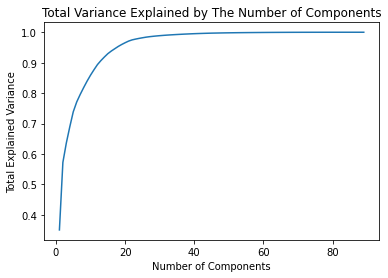

In [38]:
from matplotlib import pyplot as plt 
x = np.arange(1,len(explained_variance )+1)
y = explained_variance  
plt.title("Total Variance Explained by The Number of Components") 
plt.xlabel("Number of Components") 
plt.ylabel("Total Explained Variance") 
plt.plot(x,y) 
plt.show()

In [39]:
pca = PCA(n_components = 13)
pca.fit_transform(arr)
print(pca.explained_variance_ratio_)

[0.35021787 0.2219206  0.06392731 0.05312803 0.04921296 0.03236934
 0.02452754 0.02257755 0.02140836 0.01970113 0.01783729 0.0168613
 0.01316319]


In [17]:
print(pca.components_[0])

[ 0.12618066  0.09325245  0.04872391  0.22687687  0.18027183  0.18930599
  0.18988465  0.03346061  0.10236394  0.10733961  0.02863393  0.13862507
  0.13908628  0.0469418   0.07730828  0.12494549  0.11603913  0.11484005
  0.16245085  0.133094    0.0548986   0.1321353   0.18603671  0.098442
  0.02487939  0.04970799  0.21817574  0.09319743  0.02200503  0.05802308
  0.0733814   0.025762    0.01703558 -0.01665087  0.02354277  0.01137656
 -0.03068161  0.03923922  0.05896758  0.11382198 -0.0208643   0.11586262
  0.22325631  0.01596145  0.12461046  0.12317783  0.10957974  0.0336492
  0.04370368  0.03935431  0.02881554  0.10059949  0.08963024  0.04701214
 -0.01877885  0.02552046  0.01014427  0.0650023   0.06828715  0.02241733
 -0.00482744 -0.07434598  0.1100764   0.098442    0.02487939  0.06251632
  0.21819112  0.17466141  0.1821021   0.17629994  0.03366896  0.09438521
  0.09774342  0.02883841  0.13347908  0.13120129  0.047062    0.06041466
  0.11310761  0.1027158   0.10702471  0.14814836  0.11

In [26]:
new_array = np.empty([2,3])
new_array

array([[0., 0., 0.],
       [0., 0., 0.]])

In [28]:
pca_transformed_data = np.empty([len(arr),13])

In [29]:
n_col = 13
n_row = len(arr)
for i in range(n_col):
    for j in range(n_row):
        original_data = arr[j]
        multiplier = pca.components_[i]
        pca_data = sum(x*y for x, y in list(zip(original_data, multiplier)))
        pca_transformed_data[j,i] = pca_data

print(pca_transformed_data)

[[ 5.77889764  2.76801163 -0.48776245 ...  0.4759772   0.03187598
   0.28106767]
 [ 3.15139965  1.17166238 -0.22503493 ...  0.87339834  1.10686463
  -0.58417634]
 [ 4.86832283 -0.40865365  0.0883463  ...  0.66309444  0.79641936
  -0.69423367]
 ...
 [ 0.90985161 -0.0221394  -0.79123736 ...  0.66314535  1.1504663
  -0.27616776]
 [ 0.97438907  1.57506985 -1.09752069 ...  0.64482568  0.79070008
  -0.0171415 ]
 [ 0.76099155 -0.53074897 -0.10792417 ...  0.81469675  1.00829161
   0.13719862]]


In [30]:
len(pca_transformed_data)

8508